# 캘리포니아 집 값 예측 (지도학습)
## 캘리포니아의 집값을 예측하는 회귀 모델을 생성하자
1. 분류 / 회귀 ? : 회귀
2. 데이터를 획득  
    2.1 데이터 로드 => Pandas  
    2.2 데이터 확인  
3. 전처리(클리닝)
4. 데이터 나누기
(op) 후반전처리
3. 베이스라인 (선형모델)
4. 개선

In [36]:
#데이터 처리
import pandas as pd
import numpy as np

#왜도 및 데이터의 편증을 해결하기 위해 필요
from scipy.stats import skew 

#통계적 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

#3장 비지도학습에서 배운 "전처리 기법"
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

## 데이터 확인

In [2]:
data = pd.read_csv("./data/housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


object => 문자열을 숫자로 변환해야함  
20433 => total_bedrooms에 결측치 발생

## 전처리

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='total_bedrooms', ylabel='Count'>

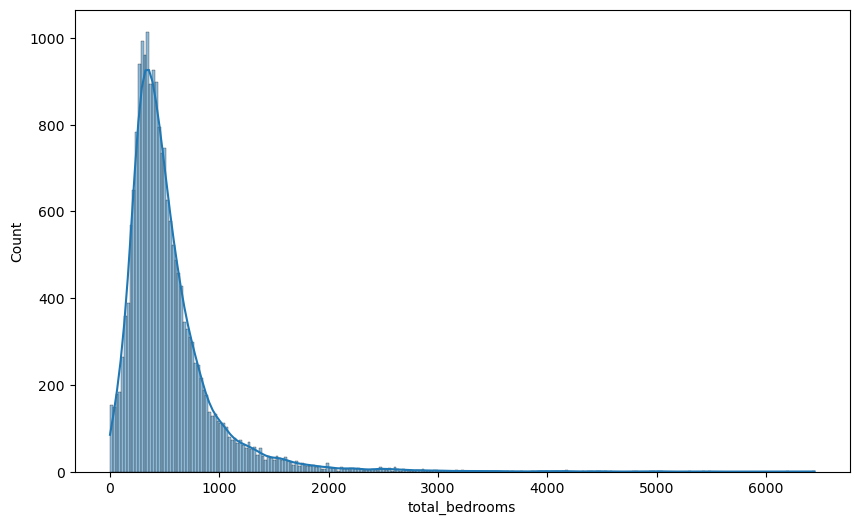

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data["total_bedrooms"], kde=True)

In [9]:
#중위값으로 채워넣기
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

In [10]:
#확인
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 상관관계를 통해 중요도를 특정

<Axes: >

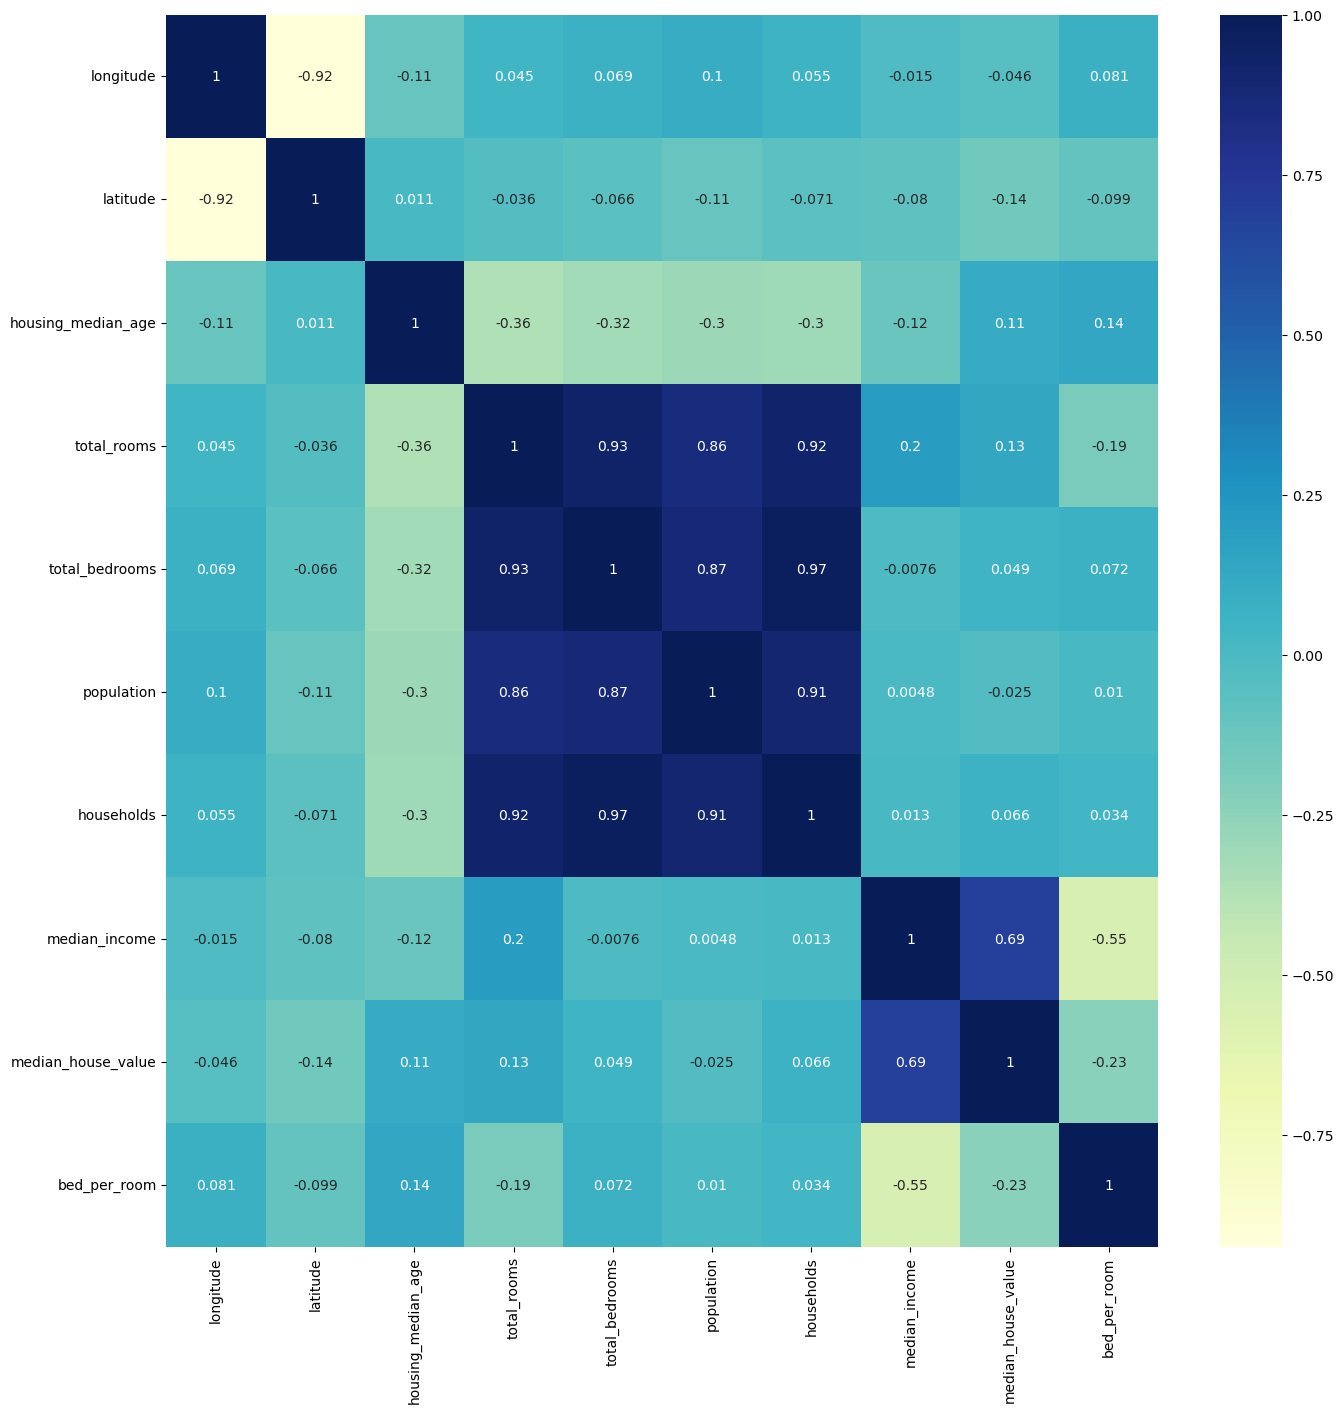

In [33]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='median_house_value', ylabel='Count'>

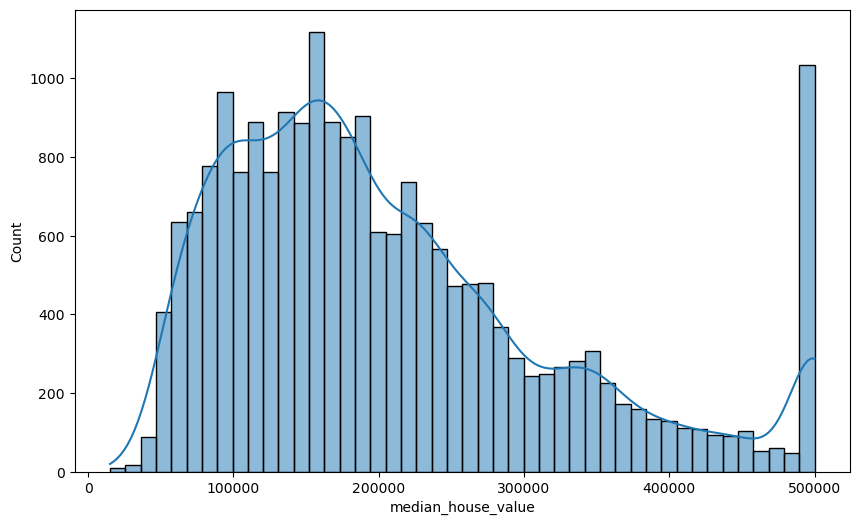

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data["median_house_value"], kde=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

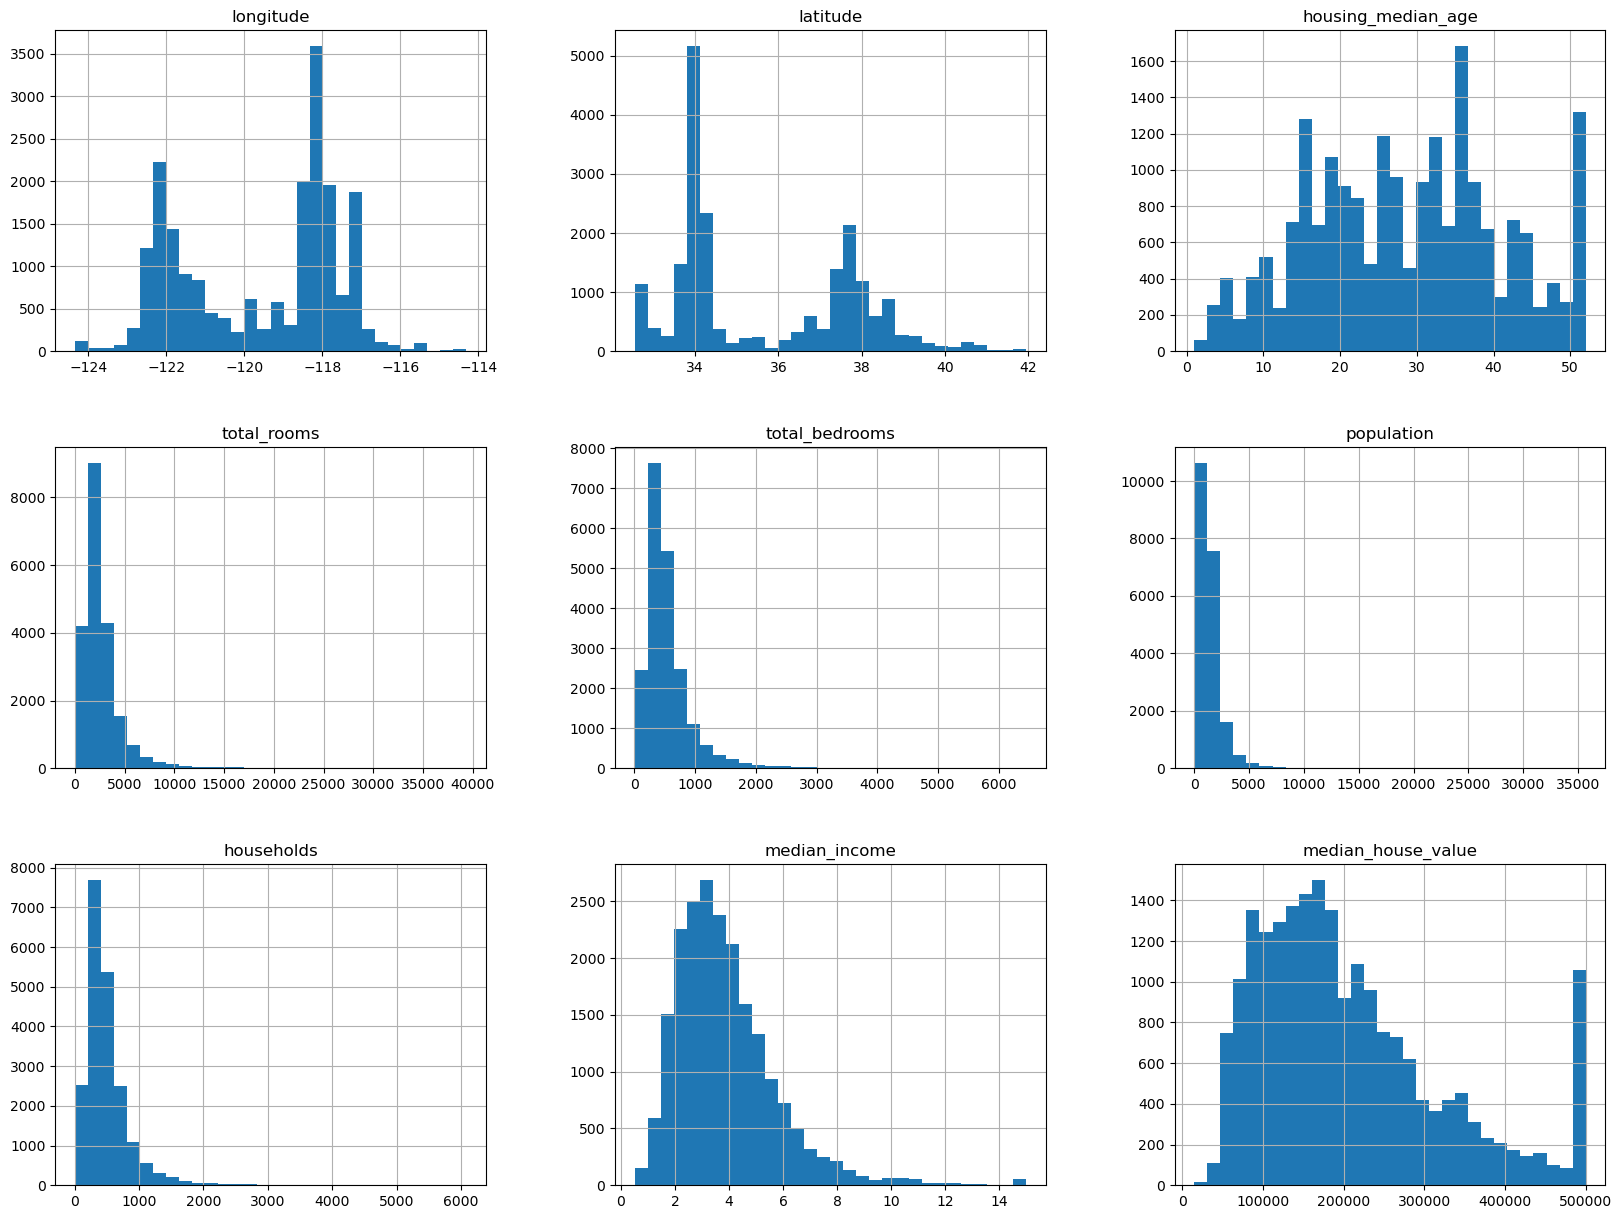

In [13]:
data.hist(bins=30,figsize=(20,15))

- 데이터의 왜도가 심함(한쪽으로 몰려있음)
- 집 값과 소득의 상관관계가 높음

## 범주형 데이터 확인

<Axes: xlabel='ocean_proximity', ylabel='count'>

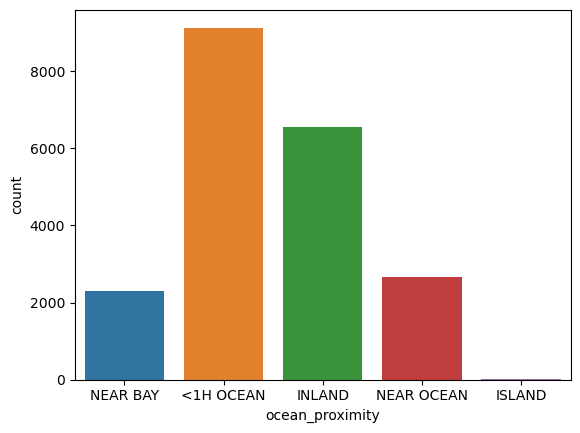

In [14]:
sns.countplot(x=data["ocean_proximity"])

## 특성공학 (Feature Engineering)

In [15]:
data["bed_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


## 데이터 나누기

In [16]:
#문제에서 답안지를 빼기
X = data.drop(["median_house_value"],axis=1)
y = data["median_house_value"]

## 데이터 왜도가 너무 심함

In [17]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns=["Features"])

In [18]:
skew_df["Skew"] = skew_df["Features"].apply(lambda features: skew(X[features]))

In [19]:
skew_df["Abs_Skew"] = skew_df["Skew"].apply(abs)

In [20]:
skew_df["Skewd"] = skew_df["Abs_Skew"].apply(lambda x: True if x>0.5 else False)

In [21]:
skew_columns = skew_df[skew_df["Abs_Skew"] > 0.5]["Features"].values
#Abs_Skew가 0.5보다 큰 Features의 값(values)만 가져옴
skew_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [22]:
for column in skew_columns:
    X[column] = np.log(X[column])

In [23]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,NEAR BAY,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,NEAR BAY,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,NEAR BAY,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,NEAR BAY,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,NEAR BAY,-1.759704
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,0.444878,INLAND,-1.493325
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,0.938756,INLAND,-1.536150
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,0.530628,INLAND,-1.536313
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,0.624440,INLAND,-1.514617


In [24]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

## 인코딩


In [25]:
encoder = LabelEncoder() #범주형으로 되어있는 문자열을 enum으로 바꾸는 것
X["ocean_proximity"] = encoder.fit_transform(X["ocean_proximity"])

In [26]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [27]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.267645 -1.367976            0.346478     0.557448        0.534421   
8267    0.703627 -0.871699            1.617807     0.662187        0.846155   
17445  -0.454356 -0.455012           -1.957806    -0.107181       -0.341781   
14265   1.227714 -1.377340            0.584852    -0.491620       -0.200175   
2271   -0.114948  0.537543            1.141059     0.195762        0.020301   
...          ...       ...                 ...          ...             ...   
11284   0.803453 -0.867017            0.505394    -0.579684       -1.025942   
11964   1.067992 -0.754652            0.346478     0.539449        0.403696   
5390    0.593818 -0.749970            0.584852     0.028731        0.401287   
860    -1.193070  0.912092           -1.083767     0.736035        0.467173   
15795  -1.422670  1.001048            1.856182     0.958639        1.550273   

       population  households  median_income  ocean

## 모델 생성

## 선형 모델

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)
print(rmse, r2)

74904.80159188576 0.5718337256013275


## KNN

In [40]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2 = r2_score(y_test, predictions_knn)
print(rmse, r2)

62595.7410295147 0.7009920673548865


## RandomForest

In [44]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)
print(rmse, r2)

50126.65214668579 0.80825213371112
